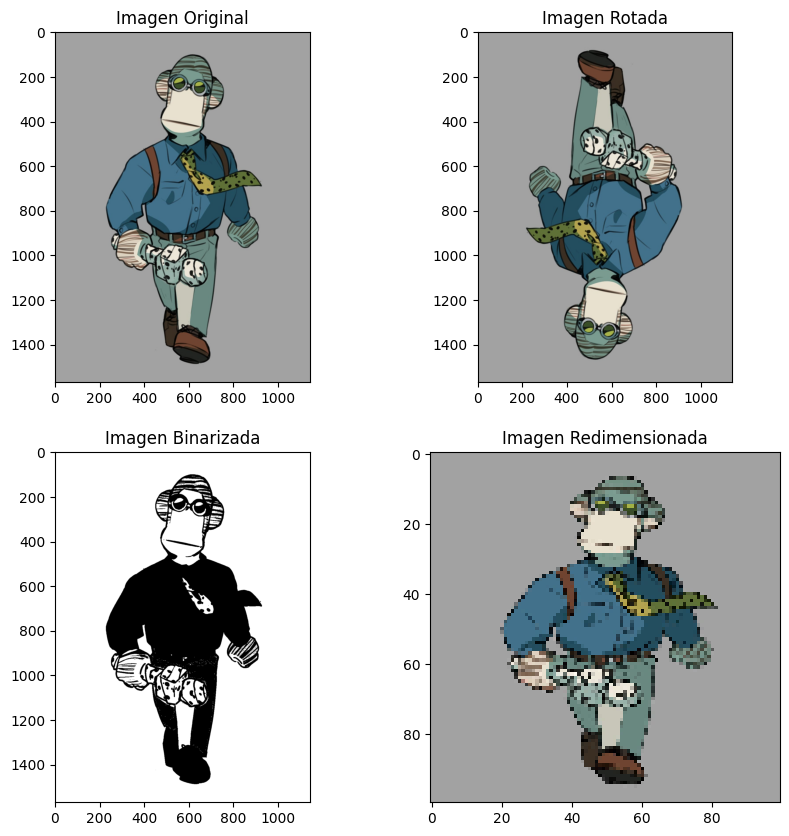

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen

# Definición de la clase ImageTransformer
class ImageTransformer:
    # Constructor de la clase
    def __init__(self, image_url):
        # Cargar la imagen desde la URL proporcionada
        with urlopen(image_url) as url:
            self.image = mpimg.imread(url, format='jpg')

    # Método para rotar la imagen
    def rotate_transformer(self, num_rotations):
        # Calcular el número de rotaciones como un módulo de 4
        num_rotations = num_rotations % 4
        # Rotar la imagen
        return np.rot90(self.image, num_rotations)

    # Método para binarizar la imagen
    def binarize_image(self):
        # Convertir la imagen a escala de grises
        grayscale = self.image.mean(axis=2)
        # Binarizar la imagen
        return grayscale > 128

    # Método para redimensionar la imagen
    def resize_transformer(self, new_size, method='nearest'):
        # Obtener el tamaño original de la imagen
        old_size = self.image.shape
        # Calcular la relación de tamaño
        row_ratio, col_ratio = old_size[0]/new_size[0], old_size[1]/new_size[1]

        # Si el método es 'nearest'
        if method == 'nearest':
            # Calcular los índices de las filas y columnas
            row_idx = (np.floor(np.arange(new_size[0])*row_ratio)).astype(int)
            col_idx = (np.floor(np.arange(new_size[1])*col_ratio)).astype(int)
            # Redimensionar la imagen
            return self.image[row_idx][:, col_idx]

# Uso de la clase con tu imagen
transformer = ImageTransformer('https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/436235546_428624316415525_3103343456685683113_n.jpg')
rotated = 2 # Numero de rotaciones
rotated_image = transformer.rotate_transformer(rotated)
binarized_image = transformer.binarize_image()
resized_image = transformer.resize_transformer((100, 100))

# Para visualizar las imágenes transformadas
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(transformer.image)
plt.title('Imagen Original')

plt.subplot(2,2,2)
plt.imshow(rotated_image)
plt.title('Imagen Rotada')

plt.subplot(2,2,3)
plt.imshow(binarized_image, cmap='gray')
plt.title('Imagen Binarizada')

plt.subplot(2,2,4)
plt.imshow(resized_image)
plt.title('Imagen Redimensionada')

plt.show()

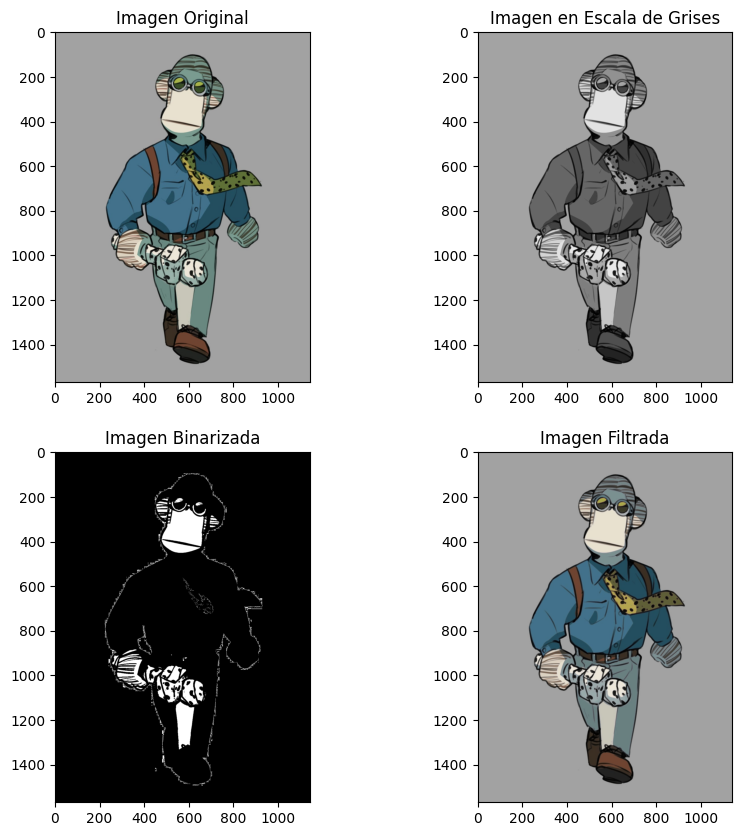

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
from scipy.ndimage import median_filter

class ImageProcessor:
    def __init__(self, image_url):
        with urlopen(image_url) as url:
            self.image = mpimg.imread(url, format='jpg')

    def to_grayscale(self, method='luminance'):
        if method == 'luminance':
            return 0.2989 * self.image[:, :, 0] + 0.5870 * self.image[:, :, 1] + 0.1140 * self.image[:, :, 2]
        elif method == 'max':
            return np.max(self.image, axis=2)

    def binarize(self):
        grayscale = self.to_grayscale()
        threshold = np.median(grayscale)
        return grayscale > threshold

    def apply_median_filter(self, size=3):
        return median_filter(self.image, size=size)

# Crear una instancia de ImageProcessor con tu imagen
processor = ImageProcessor('https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/436235546_428624316415525_3103343456685683113_n.jpg')

# Aplicar los métodos a la imagen
grayscale_image = processor.to_grayscale()
binarized_image = processor.binarize()
filtered_image = processor.apply_median_filter()

# Visualizar las imágenes procesadas
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(processor.image)
plt.title('Imagen Original')

plt.subplot(2,2,2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Imagen en Escala de Grises')

plt.subplot(2,2,3)
plt.imshow(binarized_image, cmap='gray')
plt.title('Imagen Binarizada')

plt.subplot(2,2,4)
plt.imshow(filtered_image)
plt.title('Imagen Filtrada')

plt.show()



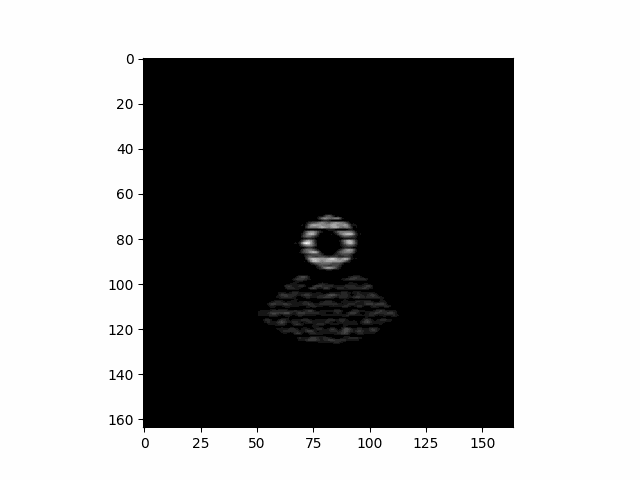

In [27]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import requests
from PIL import Image as PILImage
from io import BytesIO
from IPython.display import Image

class ImageAnimator:
    def __init__(self, image_urls):
        self.image_urls = image_urls
        self.images = []

    def cargar_imagenes(self):
        for url in self.image_urls:
            response = requests.get(url)
            self.images.append(PILImage.open(BytesIO(response.content)))

    def update(self, frame):
        plt.imshow(self.images[frame], cmap='gray', animated=True)

    def animate(self):
        fig = plt.figure()
        ani = animation.FuncAnimation(fig, self.update, frames=len(self.images), interval=200)
        ani.save("original.gif", writer='imagemagick', fps=30)

# Uso de la clase
Images_16 = [
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0001.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0002.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0003.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0004.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0005.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0006.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0007.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0008.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0009.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0010.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0011.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0012.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0013.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0014.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0015.png',
    'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Actividad_7/imagenes/0016.png',
            ]
animator = ImageAnimator(Images_16)
animator.cargar_imagenes()
Image(filename="original.gif")

